In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#한글 인코딩
from matplotlib.pylab import rcParams
rcParams['font.family'] = 'Malgun Gothic'

In [2]:
titanic = pd.read_csv("C:/Users/152/Downloads/titanic_train.csv", encoding="utf-8", index_col=0)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


- 생존 확률 값을 계산을 하기 떄문에 분류임 

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<Axes: xlabel='Pclass', ylabel='count'>

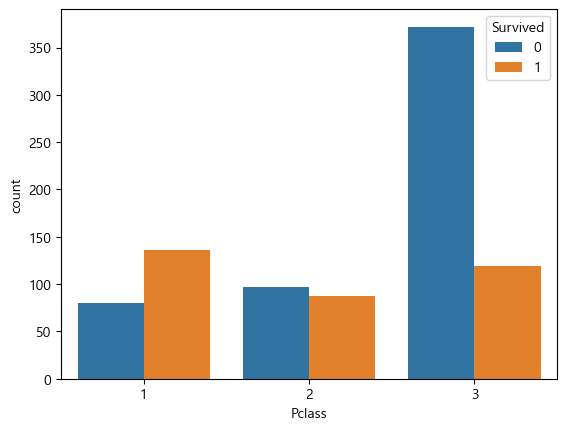

In [4]:
#EDA 
#막대프를 그려서 어떤 특성이 가지고 있는지 확인할거임 '
sns.countplot (data = titanic, x='Pclass', hue = 'Survived' ) #Pclass 퍼스트 클래스 (좌석 등급)

<Axes: xlabel='Embarked', ylabel='count'>

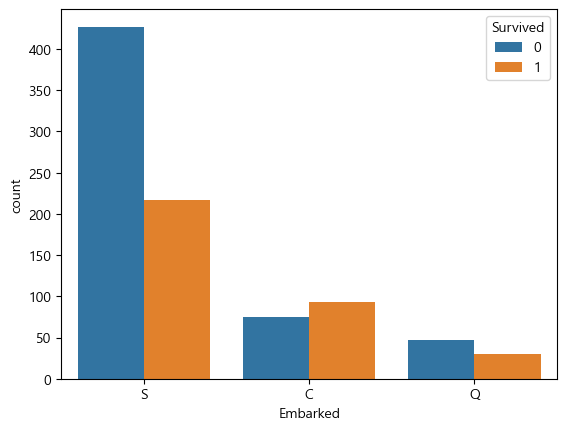

In [5]:
# Embarked 에 따라 생손자, 사망자가 얼마나 존재하는지 countplot으로 그려보기 
sns.countplot (data = titanic, x='Embarked', hue = 'Survived' ) #Pclass 퍼스트 클래스 (좌석 등급)

In [6]:
#null 값 채워주기 
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
titanic['Embarked']=titanic['Embarked'].fillna('S')

In [8]:
# 한 컬럼 내 존재하는 값들의 샘플 비중 확인하기 

titanic['Embarked'].value_counts()/len(titanic) * 100

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64

In [9]:
titanic.shape[0]

891

<Axes: xlabel='Sex', ylabel='count'>

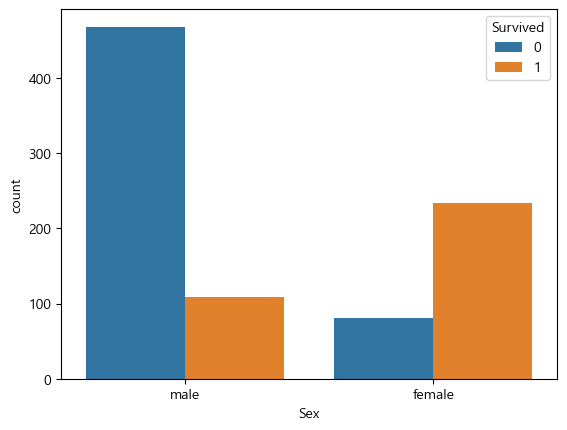

In [10]:
# 성별 칼럼을 생존자 여부에 따른 샘플 수를 시가고하해보세요
sns.countplot(data=titanic, x = 'Sex', hue = 'Survived')



In [11]:
# 성별마다 카운트 값을 구해보세요 
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# 8월 27일 

<Axes: xlabel='Pclass', ylabel='Fare'>

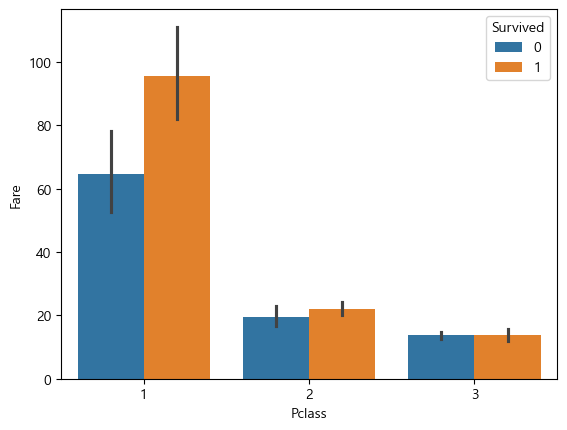

In [13]:
# 2개의 변수 간의 조합으로 사망자, 생손자 수 비교하는 그래프 그려보기 

#막대그래프
sns.barplot(data = titanic, x = 'Pclass', y = 'Fare', hue = 'Survived') #탑승요금 일등급이면 진짜 비싼 요금을 받았는가를 확인

비싼 돈을 내고 좋은 곳에 탄게 생존률이 더 높은거 아닐까? 라고 추측 가능
생존확률에 중요한 요인이 될 수 있음 

C:\Users\152\AppData\Local\Temp\ipykernel_21208\4119253879.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])#바로 데이터의 이름을 입력하면 됨


<Axes: xlabel='Fare', ylabel='Density'>

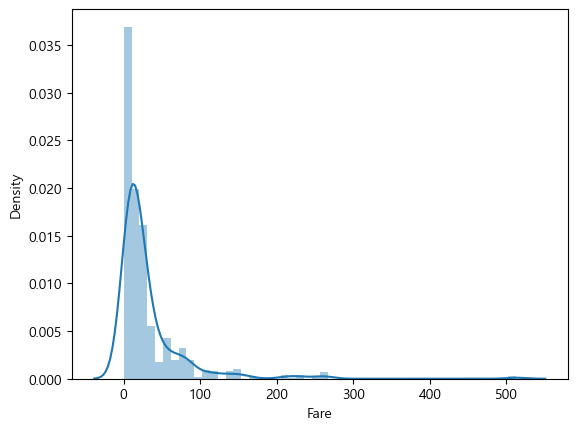

In [14]:
#전체 비율을 확인하기 위해 밀도를 찍어볼거임? 
#변수의 밀도를 확인하는 그래프 그려보기 

sns.distplot(titanic['Fare'])#바로 데이터의 이름을 입력하면 됨 

일등급이 삼등급이랑 유의미하게 차이나는 금액이 아닌 것 같음. 
- 500이 이상치라고 판단됨. -> 어떤 정보를 가지고 있늕비 확인해야함 

In [18]:
#탑승 요금 이상치 확인 후  전처리 

#탑승 요금이 500불 이상인 고객 데이터 확인하기 
titanic[titanic['Fare']>= 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [20]:
#한명이 세개를 한번에 결제했다고 가정하고 1/3로 나눠줄거임 

#탑승 요금이 500 이상인 3명의 고객의 요금을 1/3으로 나눠줌

titanic.loc[titanic['Fare']>= 500,'Fare'] = 512/3 #앞에 조건 모든 행이 조회, 내가 확인하고 싶은 컬럼의 이름만 넣어줌

In [24]:
#이상치 처리 후 확인 
titanic[titanic['Fare']>= 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [45]:
# 사망자와 생존자로 나누어 distplot 그려보기 

#사망자 데이터 프레임 생성 
perish = titanic[titanic['Survived']==0]

#생존자 데이터프레임 생성
survivor = titanic[titanic['Survived']==1]

In [46]:
perish['Survived'].value_counts()

Survived
0    549
Name: count, dtype: int64

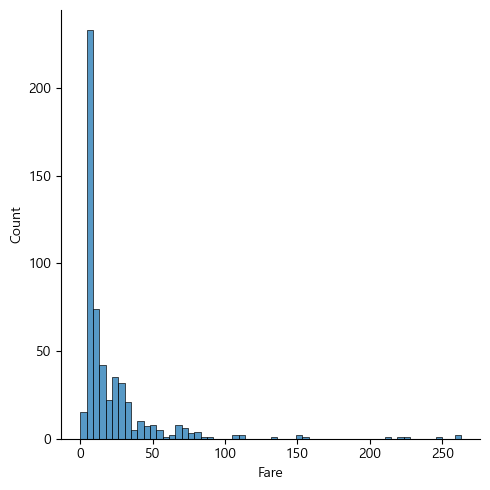

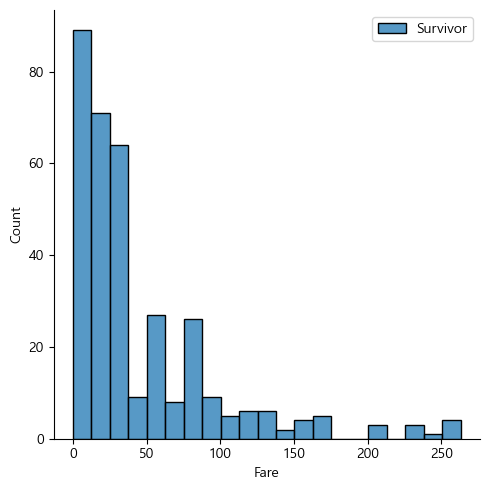

In [48]:
sns.displot(perish['Fare'],label='Perish')
sns.displot(survivor['Fare'],label = 'Survivor')
plt.legend() 

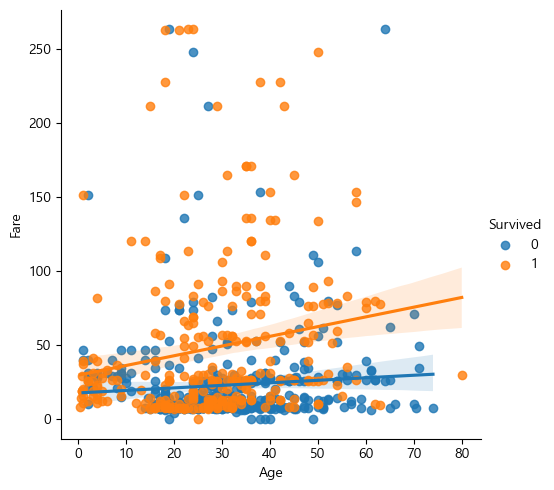

In [51]:
# 개별 탑승객의 fearture 간 관계 확인하는 산점도 그래프 그려보기  

sns.lmplot(data=titanic,  x='Age', y='Fare', hue = 'Survived')

<Axes: xlabel='Parch', ylabel='count'>

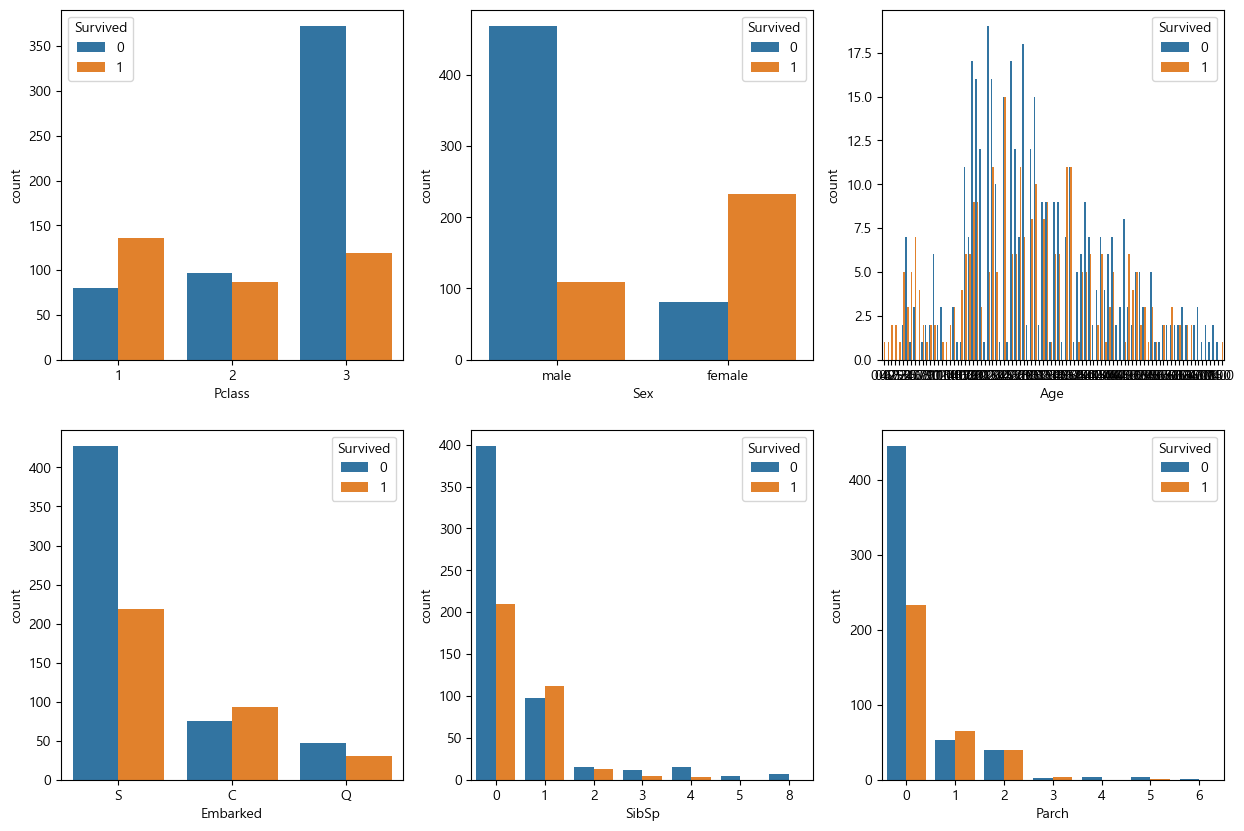

In [56]:
#여러 개의 plot을 한 번에 그려서 확인해보기 

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols =3,figsize=(15, 10))

sns.countplot(data=titanic, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=titanic, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=titanic, x='Age', hue='Survived', ax=ax3)
sns.countplot(data=titanic, x='Embarked', hue='Survived', ax=ax4)
sns.countplot(data=titanic, x='SibSp', hue='Survived', ax=ax5)
sns.countplot(data=titanic, x='Parch', hue='Survived', ax=ax6)

In [59]:
#SibSp 와 Parch 합치기 
#함께 탑승한 가족 수 컬럼 새로 생성 

titanic['Family_Size']= titanic['SibSp'] + titanic['Parch']

<Axes: xlabel='Family_Size', ylabel='count'>

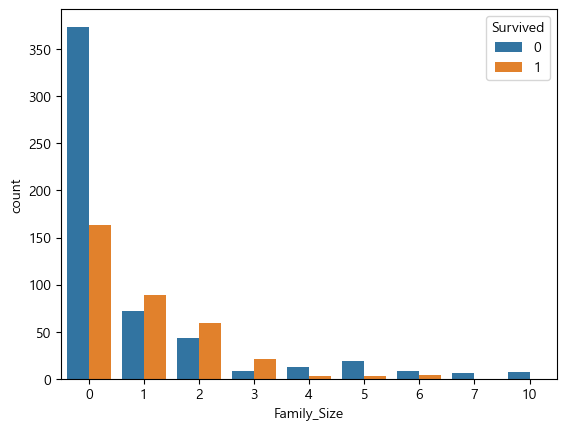

In [60]:
sns.countplot(data=titanic, x='Family_Size',hue='Survived')

In [62]:
#Alone 새롭게 생성하기 

#Family size 칼럼에서 혼자 왔으면 Alone 칼럼에 1을 넣고, 동행자가 있으면 0을 넣어줌
titanic.loc[titanic['Family_Size']==0, 'Alone'] = 1
titanic.loc[titanic['Family_Size']!=0, 'Alone'] = 0

In [63]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0


In [65]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [68]:
# 사물함 사용여부 컬럼 새로 만들기 

titanic.loc[titanic['Cabin'].isnull(), 'Cabin_Use'] = 0
titanic.loc[titanic['Cabin'].notnull(), 'Cabin_Use'] = 1

In [69]:
titanic['Cabin_Use'].value_counts()

Cabin_Use
0.0    687
1.0    204
Name: count, dtype: int64

In [72]:
#이름 확인하기 
titanic['Name'].sample(30)

PassengerId
276                    Andrews, Miss. Kornelia Theodosia
612                                Jardin, Mr. Jose Neto
231         Harris, Mrs. Henry Birkhardt (Irene Wallach)
841                          Alhomaki, Mr. Ilmari Rudolf
61                                 Sirayanian, Mr. Orsen
14                           Andersson, Mr. Anders Johan
678                              Turja, Miss. Anna Sofia
240                               Hunt, Mr. George Henry
830            Stone, Mrs. George Nelson (Martha Evelyn)
71                            Jenkin, Mr. Stephen Curnow
821    Hays, Mrs. Charles Melville (Clara Jennings Gr...
181                         Sage, Miss. Constance Gladys
268                             Persson, Mr. Ernst Ulrik
234                       Asplund, Miss. Lillian Gertrud
525                                    Kassem, Mr. Fared
755                     Herman, Mrs. Samuel (Jane Laver)
271                                Cairns, Mr. Alexander
556                

In [75]:
c ='Andrews, Miss. Kornelia Theodosia' 
c

'Andrews, Miss. Kornelia Theodosia'

In [76]:
c.split(', ')[1]

'Miss. Kornelia Theodosia'

In [78]:
c.split(', ')[1].split(', ')[0]

'Miss. Kornelia Theodosia'

In [79]:
c.split(', ')[1].split(', ')[0]

'Miss. Kornelia Theodosia'

In [80]:
#이름 칼럼 내 호칭만 잘라내는 함수 정의 하기 

def find_title(name):
    return name.split(', ')[1].split('. ')[0]

In [81]:
titanic['Title'] = titanic['Name'].apply(find_title)

In [82]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Cavin_Use,Cabin_Use,Title
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.0,0.0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1.0,1.0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,0.0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,1.0,1.0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,0.0,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0,0.0,0.0,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0,1.0,1.0,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0,0.0,0.0,Miss


<Axes: xlabel='Survived', ylabel='count'>

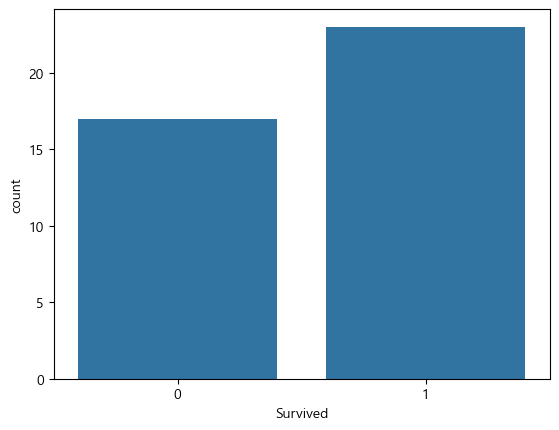

In [87]:
#호칭이 마스터인 탑승객의 생존여부 확인 

master = titanic[titanic['Title']=='Master']
sns.countplot(data=master, x = 'Survived')

In [91]:
# 마스터 컬럼 생성하기 
# 사물함 사용여부 컬럼 새로 만들기 

titanic.loc[titanic['Title']== 'Master', 'Master'] = 1
titanic.loc[titanic['Title']!= 'Master', 'Master']= 0

In [94]:
#호칭 칼럼 인코딩 

#1. 기타 호칭으로 묶어주기 
titanic['Title'].value_counts()<=6

Title
Mr              False
Miss            False
Mrs             False
Master          False
Dr              False
Rev              True
Col              True
Mlle             True
Major            True
Ms               True
Mme              True
Don              True
Lady             True
Sir              True
Capt             True
the Countess     True
Jonkheer         True
Name: count, dtype: bool

In [107]:
# non_etc = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']

#문장 타이틀이 non_etc 리스트 안에 있으면 타이틀을 반환하고 아니면 etc를 반환하라
# def title_etc(title):
    # if title.in non_etc:
        # return title 
    # else: #타이틀이 만약 5개가 아니라면
        # 'etc'

In [111]:
non_etc = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']
 
def title_etc(title):
    if title in non_etc:
        return title
    else:
        return 'etc'

In [113]:
titanic['Title_encode'] = titanic['Title'].apply(title_etc)

In [114]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Cavin_Use,Cabin_Use,Title,Master,Title_encode
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.0,0.0,Mr,0.0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1.0,1.0,Mrs,0.0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,0.0,Miss,0.0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,1.0,1.0,Mrs,0.0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,0.0,0.0,Mr,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0,0.0,0.0,Rev,0.0,etc
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0,1.0,1.0,Miss,0.0,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0,0.0,0.0,Miss,0.0,Miss


In [115]:
#호칭 카테고리 인코딩

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [116]:
titanic['Title_label'] = le.fit_transform(titanic['Title_encode'])

In [117]:
titanic['Title_label'].value_counts()

Title_label
3    517
2    182
4    125
1     40
5     20
0      7
Name: count, dtype: int64

In [118]:
#성별 인코딩 
#남자면 0, 여자면 1 

titanic.loc[titanic['Sex']== 'male', 'Sex_enconde'] = 1
titanic.loc[titanic['Sex']!= 'male', 'Sex_enconde']= 0

In [121]:
#선착장 원학인코딩 
embarked = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
embarked

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True
...,...,...,...
887,False,False,True
888,False,False,True
889,False,False,True


In [123]:
titanic = pd.concat([titanic, embarked], axis=1)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Master,Title_encode,Title_label,Sex_enconde,Embarked_C,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0.0,Mr,3,1.0,False,False,True,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0.0,Mrs,4,0.0,True,False,False,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0.0,Miss,2,0.0,False,False,True,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0.0,Mrs,4,0.0,False,False,True,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0.0,Mr,3,1.0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,...,0.0,etc,5,1.0,False,False,True,False,False,True
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,...,0.0,Miss,2,0.0,False,False,True,False,False,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,...,0.0,Miss,2,0.0,False,False,True,False,False,True


In [125]:
#age 결측치 확인 

titanic['Age'].isnull().sum()

np.int64(177)

In [127]:
#특징에 따른 나이의 평균 확인 

print('남자평균나이: ', titanic[titanic['Sex']=='male'].Age.mean())
print('여자평균나이: ', titanic[titanic['Sex']=='female'].Age.mean())

남자평균나이:  30.72664459161148
여자평균나이:  27.915708812260537


In [128]:
print('1등급 평균나이: ', titanic[titanic['Pclass']==1].Age.mean())
print('2등급 평균나이: ', titanic[titanic['Pclass']==2].Age.mean())
print('3등급 평균나이: ', titanic[titanic['Pclass']==3].Age.mean())

1등급 평균나이:  38.233440860215055
2등급 평균나이:  29.87763005780347
3등급 평균나이:  25.14061971830986


In [134]:
#성별과 등급을 둘 다 고려해서 분류
# 각 분류에 해당되는 고객의 연령이 결측치라면 그 분류의 평균 나이를 넣어줌 

#남자 1등급
m1 =titanic[(titanic["Sex"]=='male')&(titanic['Pclass']==1)].Age.mean()
#남자 2등급
m2 = titanic[(titanic["Sex"]=='male')&(titanic['Pclass']==2)].Age.mean()
#남자 3등급
m3= titanic[(titanic["Sex"]=='male')&(titanic['Pclass']==3)].Age.mean()
#여자 1등급
f1=titanic[(titanic["Sex"]=='female')&(titanic['Pclass']==1)].Age.mean()
#여자 2등급
f2 = titanic[(titanic["Sex"]=='female')&(titanic['Pclass']==2)].Age.mean()
#여자 3등급
f3 = titanic[(titanic["Sex"]=='female')&(titanic['Pclass']==3)].Age.mean()



In [136]:
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='male')&(titanic['Pclass']==1), 'Age'] = m1
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='male')&(titanic['Pclass']==2), 'Age'] = m2
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='male')&(titanic['Pclass']==3), 'Age'] = m3
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='female')&(titanic['Pclass']==1), 'Age'] = f1
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='female')&(titanic['Pclass']==2), 'Age'] = f2
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='female')&(titanic['Pclass']==3), 'Age'] = f3

In [137]:
titanic['Age'].isnull().sum()

np.int64(0)

# 모델 학습 및 예측

In [138]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Alone', 'Cavin_Use',
       'Cabin_Use', 'Title', 'Master', 'Title_encode', 'Title_label',
       'Sex_enconde', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [139]:
feature = ['Pclass','Age','Fare','Family_Size', 'Alone', 'Cabin_Use','Master','Title_label',
           'Sex_encode','Embarked_C', 'Embarked_Q', 'Embarked_S']

In [142]:
X =  titanic[]

KeyError: 'feature'

In [141]:
y =titanic['Survived']

In [ ]:
from sklearn. model_selection 